In [3]:
#Loading the IMDB dataset

In [31]:
import random

random.seed(10)

In [50]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [51]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

In [52]:
#Decoding reviews back to text

In [53]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [54]:
#Encoding the integer sequences via multi-hot encoding

In [55]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [56]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [57]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [58]:
#Building your model

In [59]:
#Model definition

In [60]:
#original model from textbook
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [61]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [62]:
#Setting aside a validation set

In [63]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [64]:
#Training your model

In [65]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5296 - accuracy: 0.7732 - val_loss: 0.4021 - val_accuracy: 0.8663
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3324 - accuracy: 0.8917 - val_loss: 0.3162 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2493 - accuracy: 0.9183 - val_loss: 0.2915 - val_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2034 - accuracy: 0.9326 - val_loss: 0.2753 - val_accuracy: 0.8912
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1698 - accuracy: 0.9449 - val_loss: 0.2880 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1429 - accuracy: 0.9558 - val_loss: 0.2963 - val_accuracy: 0.8836
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1280 - accuracy: 0.9587 - val_loss: 0.2908 - val_accuracy: 0.8871
Epoch 8/20
30/30 

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
#Plotting the training and validation loss

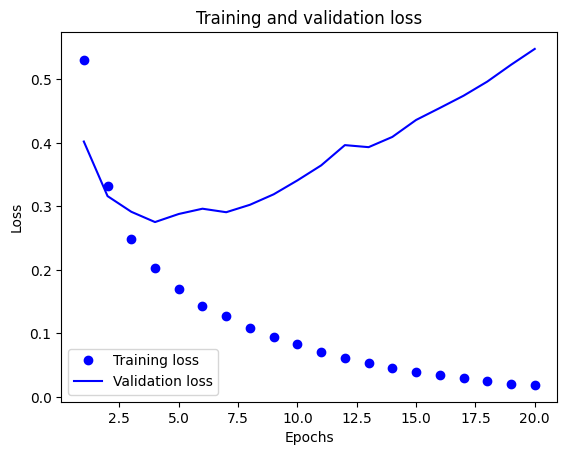

In [66]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [21]:
#Plotting the training and validation accuracy

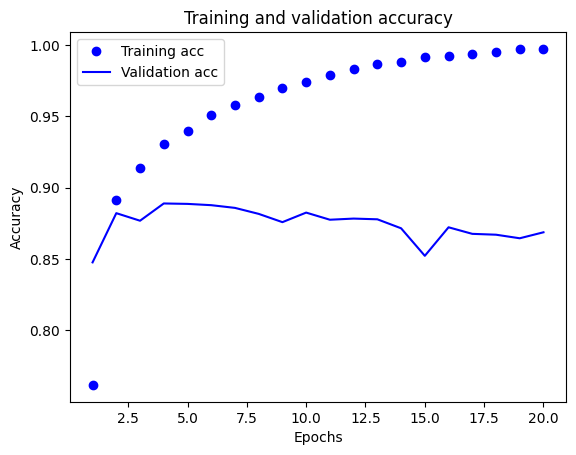

In [22]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
#######retrian model######

In [26]:
# Try using one or three hidden layers and see how doing so affects validation and test accuracy.
                # I used three hidden layers here
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 15ms/step - loss: 0.5199 - accuracy: 0.7746 - val_loss: 0.4281 - val_accuracy: 0.8184
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3087 - accuracy: 0.8925 - val_loss: 0.2963 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2197 - accuracy: 0.9260 - val_loss: 0.2941 - val_accuracy: 0.8827
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1710 - accuracy: 0.9425 - val_loss: 0.2918 - val_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1461 - accuracy: 0.9495 - val_loss: 0.2894 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1180 - accuracy: 0.9601 - val_loss: 0.3341 - val_accuracy: 0.8734
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0917 - accuracy: 0.9731 - val_loss: 0.3280 - val_accuracy: 0.8833
Epoch 8/20
30/3

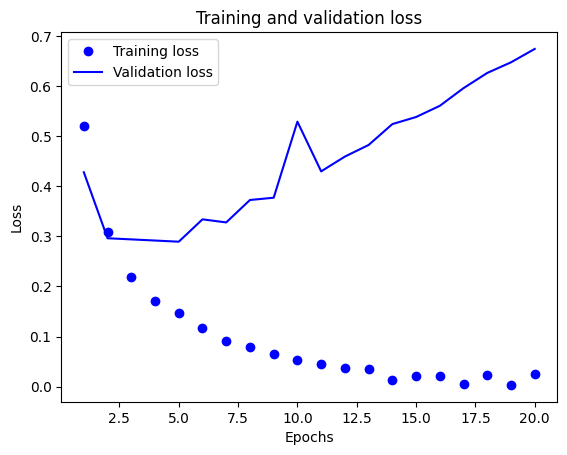

In [29]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

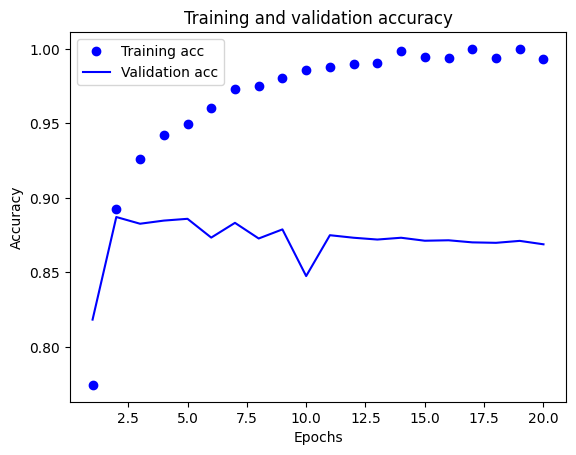

In [30]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()